In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install geopandas
!pip install plotly_express
!pip install matplotlib.pyplot


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 1.3 MB/s eta 0:00:01
     - -------------------------------------- 0.0/1.1 MB 1.3 MB/s eta 0:00:01
     - -------------------------------------- 0.0/1.1 MB 245.8 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.1 MB 363.1 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.1 MB 403.5 kB/s eta 0:00:03
     ---- ----------------------------------- 0.1/1.1 MB 385.0 kB/s eta 0:00:03
     ---- ----------------------------------- 0.1/1.1 MB 400.9 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.1 MB 446.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.1 MB 446.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.1 MB 446.5 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.1 MB 349.

     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/233.8 kB ? eta -:--:--
     ----- --------------------------------- 30.7/233.8 kB 1.3 MB/s eta 0:00:01
     ----------- ------------------------- 71.7/233.8 kB 558.5 kB/s eta 0:00:01
     --------------- -------------------- 102.4/233.8 kB 653.6 kB/s eta 0:00:01
     --------------- -------------------- 102.4/233.8 kB 653.6 kB/s eta 0:00:01
     ---------------------- ------------- 143.4/233.8 kB 566.5 kB/s eta 0:00:01
     ----------------------- ------------ 153.6/233.8 kB 573.4 kB/s eta 0:00:01
     ----------------------- ------------ 153.6/233.8 kB 573.4 kB/s eta 0:00:01
     ---------------------------- ------- 184.3/233.8 kB 483.6 kB/s eta 0:00:01
     ------------------------------- ---- 204.8/233.8 kB 461.0 kB/s eta 0:00:01
     ------------------------------------ 233.8/233.8 kB 493.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/15.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install wget 
!pip install unzip


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import geopandas as gpd
import plotly_express as px
import matplotlib.pyplot as plt

In [55]:

df = pd.read_csv('dataset/go_track_trackspoints.csv')
df.head()

id   latitude  longitude  track_id                 time
0   1 -10.939341 -37.062742         1  2014-09-13 07:24:32
1   2 -10.939341 -37.062742         1  2014-09-13 07:24:37
2   3 -10.939324 -37.062765         1  2014-09-13 07:24:42
3   4 -10.939211 -37.062843         1  2014-09-13 07:24:47
4   5 -10.938939 -37.062879         1  2014-09-13 07:24:53

In [56]:
# Dataframe into Geodataframe
gdf = gpd.GeoDataFrame( df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

id   latitude  longitude  track_id                 time  \
0   1 -10.939341 -37.062742         1  2014-09-13 07:24:32   
1   2 -10.939341 -37.062742         1  2014-09-13 07:24:37   
2   3 -10.939324 -37.062765         1  2014-09-13 07:24:42   
3   4 -10.939211 -37.062843         1  2014-09-13 07:24:47   
4   5 -10.938939 -37.062879         1  2014-09-13 07:24:53   

                      geometry  
0  POINT (-37.06274 -10.93934)  
1  POINT (-37.06274 -10.93934)  
2  POINT (-37.06276 -10.93932)  
3  POINT (-37.06284 -10.93921)  
4  POINT (-37.06288 -10.93894)

In [57]:
# Plot using plotly
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(gdf, lat="latitude", lon="longitude" ,size_max=6, zoom=8, width=1200, height=800)

In [58]:
gdf = gdf[(gdf['latitude']<-10.80) & (gdf['longitude']>-37.5)]
px.scatter_mapbox(gdf, lat="latitude", lon="longitude" ,size_max=10, zoom=8, width=1200, height=800)

In [59]:
# Geofancing

# Get the data
polygon = gpd.read_file('geofancing/CENTERAREA.geojson')
polygon

geometry
0  POLYGON ((-37.05243 -10.95446, -37.05163 -10.9...

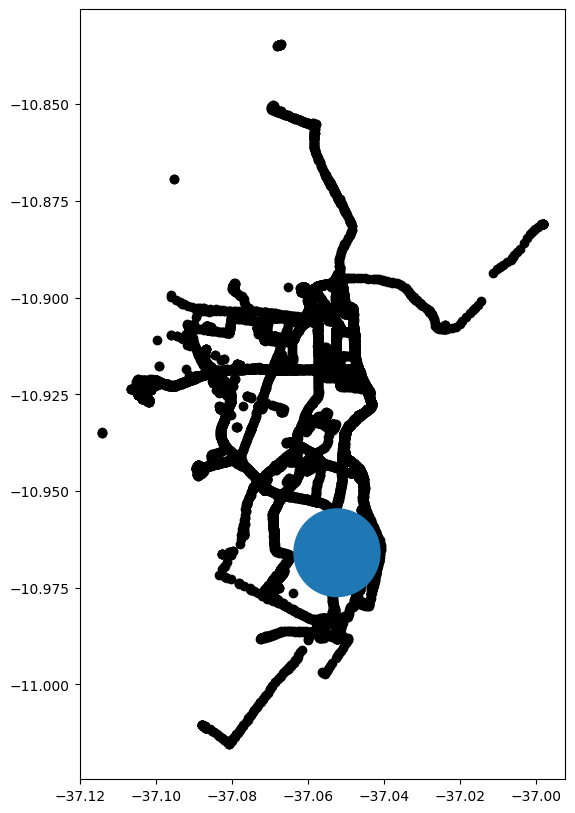

In [63]:
# Plot track_id 1 points over the Buffer Polygon 
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax, color='black')
polygon.plot(ax=ax)
#plt.tight_layout()
#plt.savefig('polygon_lines.png')
#plt.axis('off')
plt.show()

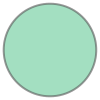

In [64]:
mask = (polygon.loc[0, 'geometry'])
mask

In [65]:
# Get points within the masks
pip_mask_geofence = gdf.within(mask)
pip_mask_geofence.value_counts()

False    15537
True      1150
dtype: int64

In [66]:
#Create PIP mask
gdf.loc[:,'geofence'] = pip_mask_geofence
gdf.sample(5)

id   latitude  longitude  track_id                 time  \
16404  17829 -10.922677 -37.102652     38020  2015-06-10 13:52:50   
10502  11825 -10.978933 -37.046987       149  2015-02-23 09:45:51   
2593    2802 -10.920258 -37.088325        27  2014-10-22 10:14:38   
15878  17303 -10.934064 -37.053464     38017  2015-06-05 13:05:00   
102      103 -10.939813 -37.059355         2  2014-09-13 13:39:00   

                          geometry  geofence  
16404  POINT (-37.10265 -10.92268)     False  
10502  POINT (-37.04699 -10.97893)     False  
2593   POINT (-37.08832 -10.92026)     False  
15878  POINT (-37.05346 -10.93406)     False  
102    POINT (-37.05935 -10.93981)     False

In [67]:
gdf.sample(20)

id   latitude  longitude  track_id                 time  \
113      114 -10.942580 -37.060968         2  2014-09-13 13:40:01   
16523  17948 -10.918731 -37.067004     38020  2015-06-10 13:59:37   
1456    1665 -10.915030 -37.052160        21  2014-10-16 13:09:00   
9927   11250 -10.902295 -37.049443       142  2015-02-19 07:48:48   
11796  13192 -10.944374 -37.046774     32446  2015-05-06 10:10:08   
16095  17520 -10.939413 -37.063308     38017  2015-06-05 13:30:55   
2476    2685 -10.987553 -37.052343        27  2014-10-22 09:26:12   
13012  14409 -10.925227 -37.080448     37962  2015-05-19 03:55:57   
11876  13272 -10.961979 -37.042824     32447  2015-05-06 10:14:06   
14404  15829 -10.943597 -37.051174     38001  2015-05-29 10:23:05   
16828  18254 -10.922792 -37.047319     38031  2015-07-23 09:05:54   
11584  12980 -10.975844 -37.047163       209  2015-04-24 15:29:55   
11860  13256 -10.944263 -37.046834     32447  2015-05-06 10:09:55   
5446    5656 -10.915491 -37.057407        40  2014-11-28 12:32:37   
11728  13124 -10.959466 -37.042604       248  2015-05-05 05:05:31   
14650  16075 -10.908488 -37.048106     38002  2015-05-29 11:50:43   
18007  19469 -10.970754 -37.054842     38082  2015-11-23 22:15:07   
13796  15221 -10.873236 -37.052780     37996  2015-05-28 16:25:06   
1051    1260 -10.917732 -37.052858        19  2014-10-15 09:39:58   
2737    2946 -10.926540 -37.102302        27  2014-10-22 10:49:21   

                          geometry  geofence  
113    POINT (-37.06097 -10.94258)     False  
16523  POINT (-37.06700 -10.91873)     False  
1456   POINT (-37.05216 -10.91503)     False  
9927   POINT (-37.04944 -10.90229)     False  
11796  POINT (-37.04677 -10.94437)     False  
16095  POINT (-37.06331 -10.93941)     False  
2476   POINT (-37.05234 -10.98755)     False  
13012  POINT (-37.08045 -10.92523)     False  
11876  POINT (-37.04282 -10.96198)      True  
14404  POINT (-37.05117 -10.94360)     False  
16828  POINT (-37.04732 -10.92279)     False  
11584  POINT (-37.04716 -10.97584)      True  
11860  POINT (-37.04683 -10.94426)     False  
5446   POINT (-37.05741 -10.91549)     False  
11728  POINT (-37.04260 -10.95947)     False  
14650  POINT (-37.04811 -10.90849)     False  
18007  POINT (-37.05484 -10.97075)      True  
13796  POINT (-37.05278 -10.87324)     False  
1051   POINT (-37.05286 -10.91773)     False  
2737   POINT (-37.10230 -10.92654)     False

In [68]:
# Replace True with In and False with Out
gdf['geofence'] = gdf['geofence'].replace({True: 'In', False: 'Out'})
gdf.head()

id   latitude  longitude  track_id                 time  \
0   1 -10.939341 -37.062742         1  2014-09-13 07:24:32   
1   2 -10.939341 -37.062742         1  2014-09-13 07:24:37   
2   3 -10.939324 -37.062765         1  2014-09-13 07:24:42   
3   4 -10.939211 -37.062843         1  2014-09-13 07:24:47   
4   5 -10.938939 -37.062879         1  2014-09-13 07:24:53   

                      geometry geofence  
0  POINT (-37.06274 -10.93934)      Out  
1  POINT (-37.06274 -10.93934)      Out  
2  POINT (-37.06276 -10.93932)      Out  
3  POINT (-37.06284 -10.93921)      Out  
4  POINT (-37.06288 -10.93894)      Out

In [69]:
px.scatter_mapbox(gdf, lat="latitude", lon="longitude", color="geofence", size='track_id' ,
                   size_max=6, zoom=12, width=1200, height=800)

In [70]:
px.scatter_mapbox(gdf[gdf["track_id"]== 23], 
                  lat="latitude", 
                  lon="longitude", 
                  color="geofence", 
                  size='track_id', 
                  animation_frame='time',
                  size_max=10, 
                  zoom=12,
                  width=1200, 
                  height=800)